### IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import random

### DATASET LOADING

In [2]:
dataset_path = r'C:\Users\TejaswiniGuru\Desktop\AI&DS\Lab Project\sign language project\Gesture Image Data'

### LOADING IMAGES AND LABELS

In [3]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for gesture_folder in os.listdir(folder):
        gesture_path = os.path.join(folder, gesture_folder)
        if os.path.isdir(gesture_path):
            label = gesture_folder 
            for filename in os.listdir(gesture_path):
                img_path = os.path.join(gesture_path, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, (50, 50)) 
                    images.append(img)
                    labels.append(label)
    return np.array(images), np.array(labels)
images, labels = load_images_from_folder(dataset_path)
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)


Images shape: (55500, 50, 50, 3)
Labels shape: (55500,)


### IMAGES INTO DATAFRAME

In [4]:
import pandas as pd

reshaped_images = images.reshape(images.shape[0], -1)

data = pd.DataFrame(reshaped_images)

data['Label'] = labels

print(data)

         0    1    2    3    4    5    6    7    8    9  ...  7491  7492  \
0       62   91  128   58   85  122   66   92  129   64  ...    67    88   
1       73   86  124   67   85  122   62   90  125   56  ...    75    90   
2       50   90  119   60   96  126   66   89  121   71  ...    69    91   
3       57   88  119   62   93  124   66   94  124   65  ...    77    89   
4       45   84  122   49   88  126   48   86  121   51  ...    73    91   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
55495  166  169  160  166  168  162  164  168  163  165  ...   194   186   
55496  158  169  161  159  170  162  162  169  164  161  ...   192   185   
55497  161  167  162  160  166  161  161  168  165  160  ...   190   183   
55498  162  167  158  163  168  159  163  170  163  163  ...   193   186   
55499  162  166  167  161  166  164  161  169  158  162  ...   191   184   

       7493  7494  7495  7496  7497  7498  7499  Label  
0        96    71    89    96 

### PLOTTING IMAGES

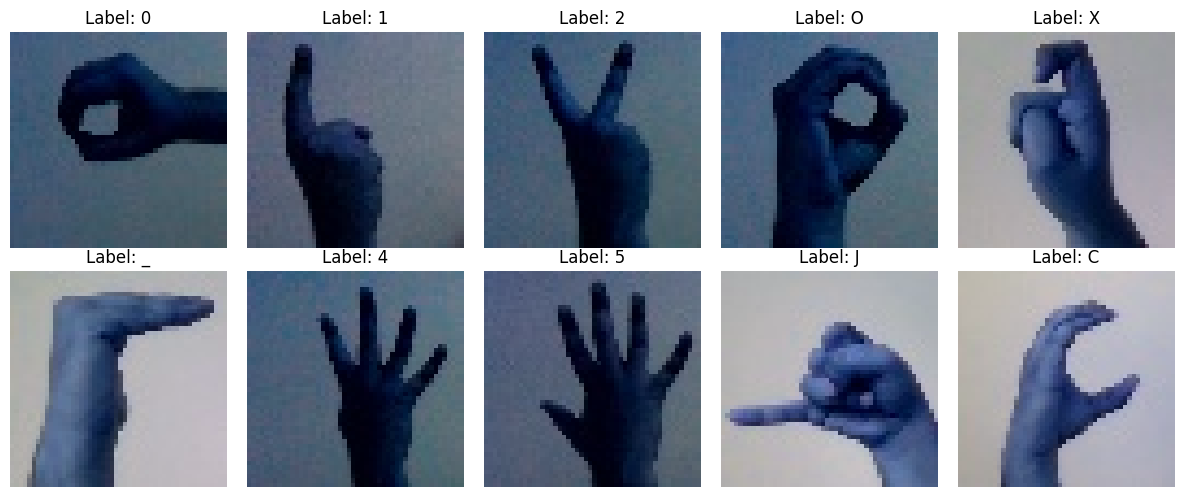

In [5]:
import matplotlib.pyplot as plt

indices_to_display = [0, 1555, 3587, 36589, 49867, 54678, 6345, 8123, 28998, 19345]

num_images = len(indices_to_display)
num_images_per_row = 5
num_rows = -(-num_images // num_images_per_row)

fig, axes = plt.subplots(num_rows, num_images_per_row, figsize=(12, 5))

for i, idx in enumerate(indices_to_display):
    row = i // num_images_per_row
    col = i % num_images_per_row

    axes[row, col].imshow(images[idx])
    axes[row, col].set_title(f"Label: {labels[idx]}")
    axes[row, col].axis('off')

for i in range(num_images, num_rows * num_images_per_row):
    row = i // num_images_per_row
    col = i % num_images_per_row
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

### PLOTTING THE DISTRIBUTION OF IMAGES

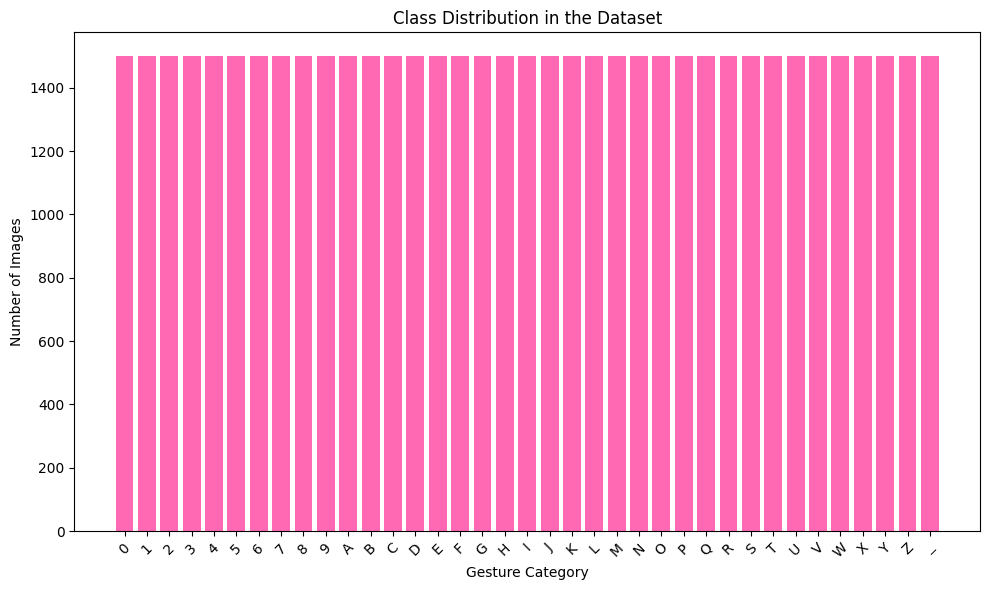

In [6]:
data_folder = dataset_path

gesture_folders = os.listdir(data_folder)

class_counts = {}

for folder_name in gesture_folders:
    folder_path = os.path.join(data_folder, folder_name)
    num_images = len(os.listdir(folder_path))
    class_counts[folder_name] = num_images

plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='hotpink')
plt.xlabel('Gesture Category')
plt.ylabel('Number of Images')
plt.title('Class Distribution in the Dataset')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### MEAN,MEDIAN,STANDARD DEVIATION, VARIANCE

In [7]:
import pandas as pd
import numpy as np

def calculate_stats(arr):
    return np.mean(arr), np.median(arr), np.var(arr), np.std(arr)

grouped_data = data.groupby('Label')

image_columns = data.columns[:-1]
summary_stats = grouped_data[image_columns].apply(lambda x: calculate_stats(x.values.flatten()))

summary_stats = summary_stats.apply(pd.Series)

summary_stats.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation']

print(summary_stats)

             Mean  Median     Variance  Standard Deviation
Label                                                     
0       69.448219    81.0  1593.025996           39.912730
1       87.565238   100.0  1659.322519           40.734783
2       74.184337    85.0  1557.184059           39.461172
3       74.553297    86.0  1813.312283           42.583005
4       74.370478    87.0  1778.742621           42.175142
5       75.631703    89.0  1676.524404           40.945383
6       77.023867    88.0  1618.252201           40.227506
7       78.593041    89.0  1780.066939           42.190840
8       77.687367    90.0  2073.261904           45.533086
9       75.531394    88.0  1951.787714           44.179042
A      130.311836   155.0  2459.138660           49.589703
B      156.507865   182.0  3007.989563           54.845142
C      151.756167   175.0  2436.783836           49.363791
D      154.281875   176.0  2358.373957           48.563093
E       71.199085    82.0  2275.750920           47.7048

C:\Users\TejaswiniGuru\AppData\Local\Temp\ipykernel_18592\1375577514.py:12: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  summary_stats = summary_stats.apply(pd.Series)


In [8]:
Name = os.listdir(dataset_path)
print(Name)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '_']


(50, 50, 3)


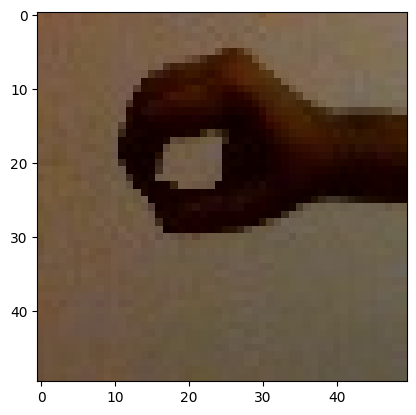

In [9]:
img1=r'C:\Users\TejaswiniGuru\Desktop\AI&DS\Lab Project\sign language project\Gesture Image Data\0\1.jpg'
image=cv2.imread(img1)
print(image.shape)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [10]:
dataset=[]
dataname=[]
count=0
for name in tqdm(os.listdir(dataset_path)):
    path=os.path.join(dataset_path,name)
    for im in os.listdir(path):
        image=cv2.imread(os.path.join(path,im))
        dataset+=[image]
        dataname+=[count]
    count=count+1

100%|██████████████████████████████████████████████████████████████████████████████████| 37/37 [00:28<00:00,  1.31it/s]


In [11]:
data=np.array(dataset)
dataname=np.array(dataname)

print(data[0])
print(dataname)

[[[ 62  91 128]
  [ 58  85 122]
  [ 66  92 129]
  ...
  [ 93 112 133]
  [ 94 114 132]
  [ 95 115 132]]

 [[ 65  92 129]
  [ 62  90 125]
  [ 67  90 128]
  ...
  [ 93 112 133]
  [ 96 113 132]
  [ 97 115 132]]

 [[ 63  89 125]
  [ 63  90 124]
  [ 65  89 125]
  ...
  [ 89 108 129]
  [ 97 111 130]
  [101 112 132]]

 ...

 [[ 60  80 105]
  [ 62  84 109]
  [ 60  82 107]
  ...
  [ 71  90  98]
  [ 78  90 100]
  [ 80  90 100]]

 [[ 58  79 106]
  [ 62  84 109]
  [ 58  84 108]
  ...
  [ 71  90  98]
  [ 71  89  96]
  [ 74  90  97]]

 [[ 56  77 104]
  [ 60  83 109]
  [ 57  83 107]
  ...
  [ 67  88  96]
  [ 71  89  96]
  [ 72  91  96]]]
[ 0  0  0 ... 36 36 36]


In [12]:
print(pd.Series(dataname).value_counts())

0     1500
19    1500
21    1500
22    1500
23    1500
24    1500
25    1500
26    1500
27    1500
28    1500
29    1500
30    1500
31    1500
32    1500
33    1500
34    1500
35    1500
20    1500
18    1500
1     1500
17    1500
2     1500
3     1500
4     1500
5     1500
6     1500
7     1500
8     1500
9     1500
10    1500
11    1500
12    1500
13    1500
14    1500
15    1500
16    1500
36    1500
Name: count, dtype: int64


In [13]:
m = len(data)
indices = list(range(m))
random.seed(2021)
random.shuffle(indices)

### TRAIN, TEST SPLIT

In [14]:
trainX=data[indices[0:(m//4)*3]]
trainY=dataname[indices[0:(m//4)*3]]

testX=data[indices[(m//4)*3:]]
testY=dataname[indices[(m//4)*3:]]

### CONVERTING CATEGORICAL TO NUMERICAL DATA

In [15]:
labels1=to_categorical(trainY)
trainY=np.array(labels1)

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(trainX,trainY,test_size=0.2,random_state=44)

In [17]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(33300, 50, 50, 3)
(33300, 37)
(8325, 50, 50, 3)
(8325, 37)


In [18]:
datagen = ImageDataGenerator(horizontal_flip=True,
                             vertical_flip=True,
                             rotation_range=20,
                             zoom_range=0.2,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.1,
                             fill_mode="nearest")

### MODEL BUILD

In [19]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout

unique_labels = np.unique(Name)
num_classes = len(unique_labels)

model = Sequential()
model.add(Conv2D(128, kernel_size=(5, 5), strides=1, padding='same', activation='relu', input_shape=(50, 50, 3)))
model.add(MaxPooling2D(pool_size=(3, 3), strides=2, padding='same'))
model.add(Conv2D(64, kernel_size=(2, 2), strides=1, activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), 2, padding='same'))
model.add(Conv2D(32, kernel_size=(2, 2), strides=1, activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), 2, padding='same'))
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 128)       9728      
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 32)        8224      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 7, 7, 32)          0

### MODEL COMPILATION

In [20]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

### MODEL FIT

In [22]:
his=model.fit(datagen.flow(X_train,Y_train,batch_size=32),validation_data=(X_test,Y_test),epochs=20)

Epoch 1/20
1041/1041 [==============================] - 325s 308ms/step - loss: 2.1482 - accuracy: 0.3432 - val_loss: 0.7549 - val_accuracy: 0.7479
Epoch 2/20
1041/1041 [==============================] - 312s 300ms/step - loss: 1.0229 - accuracy: 0.6533 - val_loss: 0.4894 - val_accuracy: 0.8389
Epoch 3/20
1041/1041 [==============================] - 311s 298ms/step - loss: 0.6451 - accuracy: 0.7788 - val_loss: 0.2541 - val_accuracy: 0.9061
Epoch 4/20
1041/1041 [==============================] - 309s 297ms/step - loss: 0.4616 - accuracy: 0.8443 - val_loss: 0.4599 - val_accuracy: 0.8530
Epoch 5/20
1041/1041 [==============================] - 306s 294ms/step - loss: 0.3880 - accuracy: 0.8699 - val_loss: 0.1279 - val_accuracy: 0.9551
Epoch 6/20
1041/1041 [==============================] - 309s 297ms/step - loss: 0.3361 - accuracy: 0.8889 - val_loss: 0.0929 - val_accuracy: 0.9646
Epoch 7/20
1041/1041 [==============================] - 315s 302ms/step - loss: 0.2937 - accuracy: 0.9029 - val_

### MODEL EVALUATION

In [23]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

261/261 [==============================] - 22s 85ms/step - loss: 0.0477 - accuracy: 0.9858
Test accuracy: 0.9858258366584778


### ACCURACY METRICS

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

predictions = model.predict(X_test)

predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(Y_test, axis=1)

accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

261/261 [==============================] - 22s 83ms/step
Accuracy: 98.58%
Precision: 0.9864
Recall: 0.9858
F1-Score: 0.9857


### MISCLASSIFIED INDICES

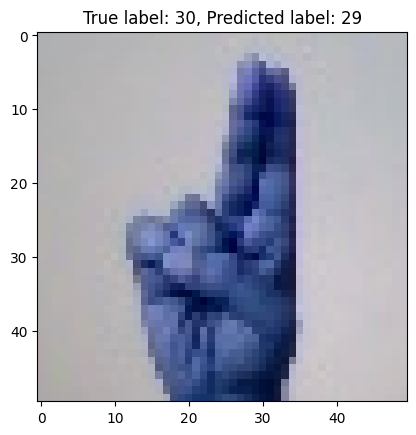

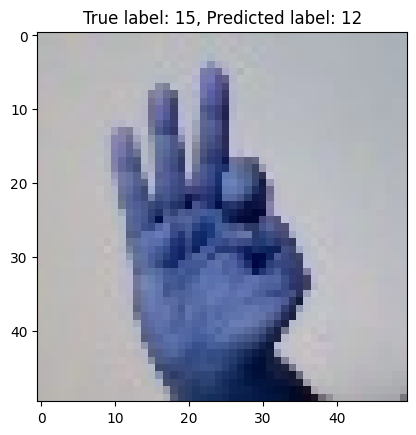

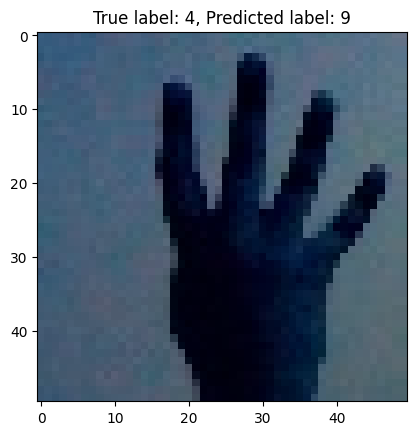

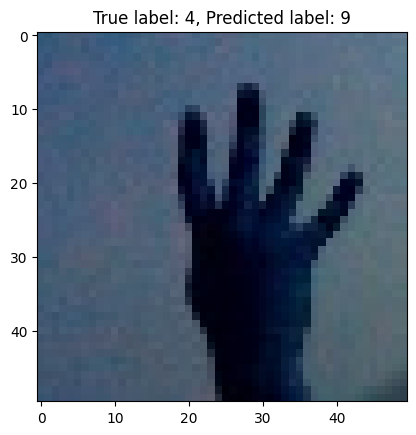

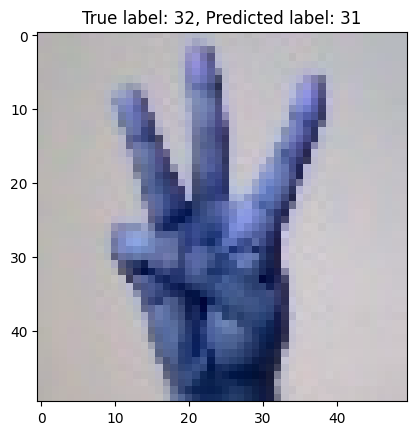

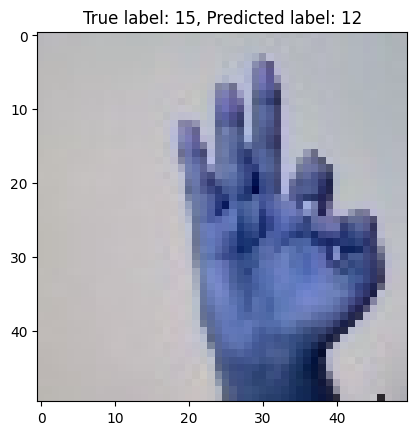

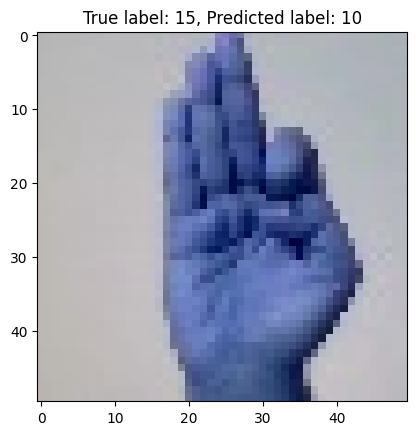

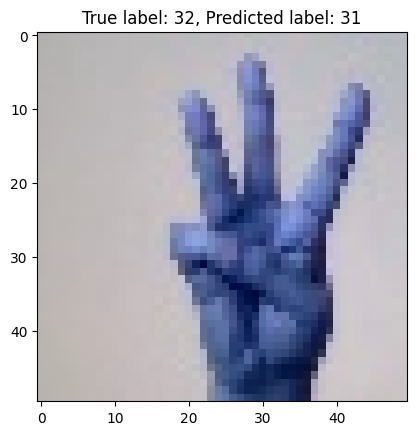

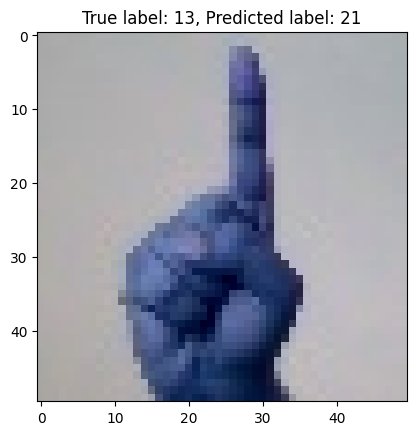

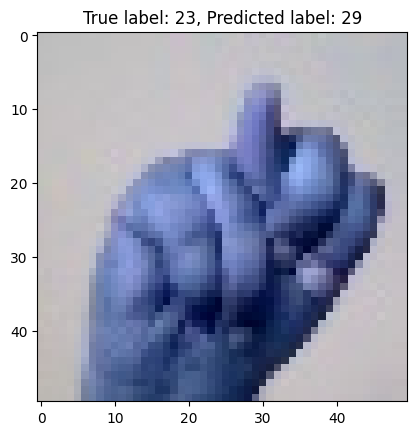

In [26]:
import matplotlib.pyplot as plt

misclassified_idx = np.where(predicted_labels != true_labels)[0]

num_samples_to_display = 10
for idx in misclassified_idx[:num_samples_to_display]:
    plt.imshow(X_test[idx])
    plt.title(f"True label: {true_labels[idx]}, Predicted label: {predicted_labels[idx]}")
    plt.show()

### MODEL PREDICT

In [31]:
import cv2
import numpy as np

image_path = r'C:\Users\TejaswiniGuru\Desktop\AI&DS\Lab Project\sign language project\Gesture Image Data\S\6.jpg'
img = cv2.imread(image_path)
resized_img = cv2.resize(img, (50, 50))

normalized_img = resized_img.astype('float32') / 255.0 
processed_img = np.expand_dims(normalized_img, axis=0) 

prediction = model.predict(processed_img)
labels = list("0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ ") 
predicted_label = labels[np.argmax(prediction)]

print(f"Predicted Label: {predicted_label}")

1/1 [==============================] - 0s 74ms/step
Predicted Label: S


### TOPIC IN THEORY - 1 PCA

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

image_pixels = data.drop('Label', axis=1)
labels = data['Label']

scaler = StandardScaler()
image_pixels_normalized = scaler.fit_transform(image_pixels)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(image_pixels_normalized)

print(pca_result)

plt.figure(figsize=(8, 6))
for label in labels.unique():
    indices = labels == label
    plt.scatter(pca_result[indices, 0], pca_result[indices, 1], label=label, alpha=0.8)
plt.legend(title='Gestures')
plt.title('PCA Visualization of Image Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [70]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
import pandas as pd

label_encoder = LabelEncoder()
dataname_encoded = label_encoder.fit_transform(dataname)

categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
data = pd.get_dummies(data, columns=categorical_columns)

X = data.values  
y = dataname_encoded 

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

num_splits = 5

stratified_kfold = StratifiedKFold(n_splits=num_splits, shuffle=True, random_state=42)

accuracy_scores = []

for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = pca_result[train_index], pca_result[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

mean_accuracy = sum(accuracy_scores) / num_splits
print("Mean Accuracy:", mean_accuracy)

C:\Users\TejaswiniGuru\anaconda3\envs\Tejaswini\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\TejaswiniGuru\anaconda3\envs\Tejaswini\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

Mean Accuracy: 0.40165765765765765


C:\Users\TejaswiniGuru\anaconda3\envs\Tejaswini\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


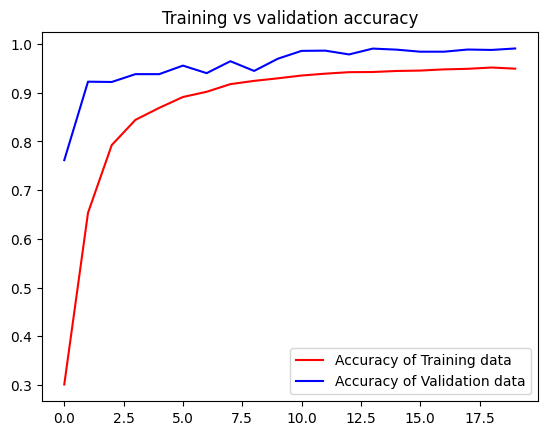

<Figure size 640x480 with 0 Axes>

In [47]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

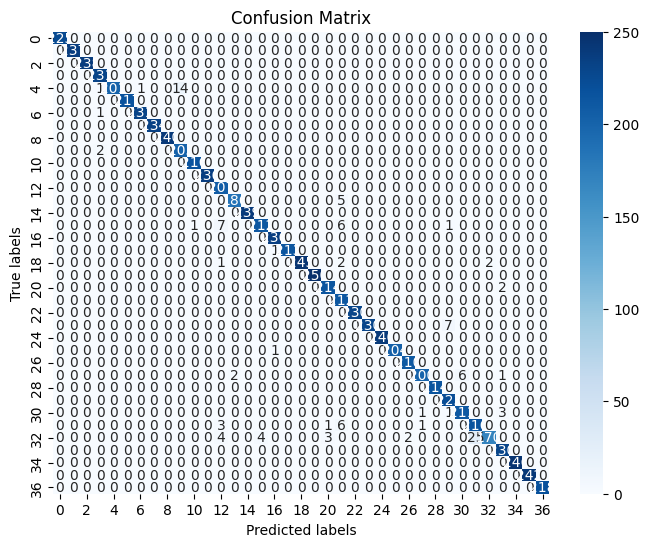

In [32]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [33]:
model.save('cnn_model.keras')

In [21]:
from tensorflow.keras.models import load_model

model=load_model('cnn_model.keras')

In [22]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

261/261 [==============================] - 28s 100ms/step - loss: 0.0477 - accuracy: 0.9858
Test accuracy: 0.9858258366584778


In [39]:
pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(50,50,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

In [40]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(len(Name), activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [41]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [22]:
his=model.fit(datagen.flow(X_train,Y_train,batch_size=32),validation_data=(X_test,Y_test),epochs=20)


Epoch 1/20
1041/1041 [==============================] - 1077s 989ms/step - loss: 1.0700 - accuracy: 0.6643 - val_loss: 0.4653 - val_accuracy: 0.8490
Epoch 2/20
1041/1041 [==============================] - 934s 898ms/step - loss: 0.5276 - accuracy: 0.8244 - val_loss: 0.4196 - val_accuracy: 0.8615
Epoch 3/20
1041/1041 [==============================] - 932s 895ms/step - loss: 0.4290 - accuracy: 0.8525 - val_loss: 0.4566 - val_accuracy: 0.8327
Epoch 4/20
1041/1041 [==============================] - 918s 882ms/step - loss: 0.3787 - accuracy: 0.8720 - val_loss: 0.3875 - val_accuracy: 0.8836
Epoch 5/20
1041/1041 [==============================] - 883s 849ms/step - loss: 0.3569 - accuracy: 0.8785 - val_loss: 0.3466 - val_accuracy: 0.8877
Epoch 6/20
1041/1041 [==============================] - 864s 830ms/step - loss: 0.3277 - accuracy: 0.8865 - val_loss: 0.4424 - val_accuracy: 0.8703
Epoch 7/20
1041/1041 [==============================] - 849s 815ms/step - loss: 0.3078 - accuracy: 0.8948 - val

In [42]:
his=model.fit(datagen.flow(X_train,Y_train,batch_size=32),validation_data=(X_test,Y_test),epochs=5)


Epoch 1/5
1041/1041 [==============================] - 965s 885ms/step - loss: 1.0591 - accuracy: 0.6701 - val_loss: 0.4607 - val_accuracy: 0.8482
Epoch 2/5
1041/1041 [==============================] - 875s 841ms/step - loss: 0.5185 - accuracy: 0.8259 - val_loss: 0.3505 - val_accuracy: 0.8795
Epoch 3/5
1041/1041 [==============================] - 833s 801ms/step - loss: 0.4187 - accuracy: 0.8590 - val_loss: 0.3430 - val_accuracy: 0.8771
Epoch 4/5
1041/1041 [==============================] - 850s 816ms/step - loss: 0.3853 - accuracy: 0.8700 - val_loss: 0.3431 - val_accuracy: 0.8844
Epoch 5/5
1041/1041 [==============================] - 835s 802ms/step - loss: 0.3463 - accuracy: 0.8815 - val_loss: 0.3584 - val_accuracy: 0.8907


In [43]:
model.save('cnn_models.keras')

In [2]:
from tensorflow.keras.models import load_model

model=load_model('cnn_models.keras')

In [3]:
import cv2
import numpy as np

image_path = r'C:\Users\TejaswiniGuru\Desktop\AI&DS\Lab Project\sign language project\Gesture Image Data\4\2.jpg'
img = cv2.imread(image_path)
resized_img = cv2.resize(img, (50, 50))

normalized_img = resized_img.astype('float32') / 255.0 
processed_img = np.expand_dims(normalized_img, axis=0) 

prediction = model.predict(processed_img)
labels = list("0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ ") 
predicted_label = labels[np.argmax(prediction)]

print(f"Predicted Label: {predicted_label}")

1/1 [==============================] - 13s 13s/step
Predicted Label: 4


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model


# Function to preprocess the image for model prediction
def preprocess_image(frame):
    resized_frame = cv2.resize(frame, (50, 50))
    normalized_frame = resized_frame.astype('float32') / 255.0
    return normalized_frame

# Function to predict gesture
def predict_gesture(frame):
    processed_frame = preprocess_image(frame)
    prediction = model.predict(np.expand_dims(processed_frame, axis=0))
    labels = list("0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ ")
    predicted_gesture = labels[np.argmax(prediction)]
    return predicted_gesture

# Access the webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()

    predicted_gesture = predict_gesture(frame)

    cv2.putText(frame, predicted_gesture, (50, 50), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 1, (0, 255, 0), 2)

    cv2.imshow('Gesture Recognition', frame)

    # Check for the 'q' key to quit the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close OpenCV windows
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 149ms/step


1/1 [==============================] - 0s 130ms/step


1/1 [==============================] - 0s 140ms/step


1/1 [==============================] - 0s 57ms/step


1/1 [==============================] - 0s 86ms/step


1/1 [==============================] - 0s 102ms/step


1/1 [==============================] - 0s 119ms/step


1/1 [==============================] - 0s 118ms/step


1/1 [==============================] - 0s 113ms/step


1/1 [==============================] - 0s 118ms/step


1/1 [==============================] - 0s 118ms/step


1/1 [==============================] - 0s 134ms/step


1/1 [==============================] - 0s 96ms/step


1/1 [==============================] - 0s 116ms/step


1/1 [==============================] - 0s 156ms/step


1/1 [==============================] - 0s 124ms/step


1/1 [==============================] - 0s 198ms/step


1/1 [==============================] - 0s 175ms/step


1/1 [==============================] - 0s 170ms/step


1/1 [==============================] - 0s 193ms/step


1/1 [==============================] - 0s 196ms/step


1/1 [==============================] - 0s 274ms/step


1/1 [==============================] - 0s 220ms/step


1/1 [==============================] - 0s 215ms/step


1/1 [==============================] - 0s 237ms/step


1/1 [==============================] - 0s 212ms/step


1/1 [==============================] - 0s 208ms/step


1/1 [==============================] - 0s 210ms/step


1/1 [==============================] - 0s 429ms/step


1/1 [==============================] - 0s 335ms/step


1/1 [==============================] - 0s 343ms/step


1/1 [==============================] - 1s 500ms/step


1/1 [==============================] - 0s 350ms/step


1/1 [==============================] - 0s 432ms/step


1/1 [==============================] - 0s 316ms/step


1/1 [==============================] - 0s 141ms/step


1/1 [==============================] - 0s 198ms/step


1/1 [==============================] - 0s 186ms/step


1/1 [==============================] - 0s 375ms/step


1/1 [==============================] - 0s 323ms/step


1/1 [==============================] - 0s 368ms/step


1/1 [==============================] - 0s 385ms/step


1/1 [==============================] - 1s 630ms/step


1/1 [==============================] - 0s 343ms/step
